In [3]:
import pandas as pd

База данных игроков FIFA19.

In [21]:
df = pd.read_csv('data.csv')

In [22]:
df['Value'] = df['Value'].map(lambda x: str(x).lstrip('€'))
df['Value'] = df['Value'].map(lambda x: float(str(x).rstrip('K'))/1000 if 'K' in x else float(str(x).rstrip('M')))
df['Wage'] = df['Wage'].map(lambda x: str(x).lstrip('€'))
df['Wage'] = df['Wage'].map(lambda x: float(str(x).rstrip('K'))/1000 if 'K' in x else float(str(x).rstrip('M')))

0        110.50
1         77.00
2        118.50
3         72.00
4        102.00
          ...  
18202      0.06
18203      0.06
18204      0.06
18205      0.06
18206      0.06
Name: Value, Length: 18207, dtype: float64

Построим круговую диаграмму сравнения предпочитаемых рабочих ног футболистов.

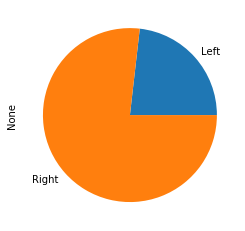

In [294]:
preffered_foot = df.groupby('Preferred Foot').size()
preffered_foot.plot(kind = 'pie')

Из диаграммы видно, что рабочей ногой у подавляющего числа футболистов является правая.

Однако из графиков ниже, можно заметить, что в свою очередь, левоногие футболисты имеют незначительно выше стоимости и зарплаты. Что говорит, о том, что левоногие футболисты талантливее, а, следовательно, ценнее.

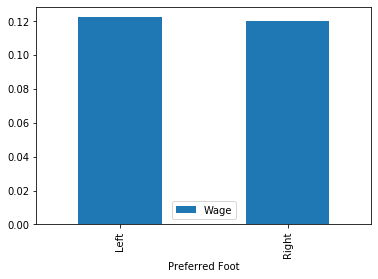

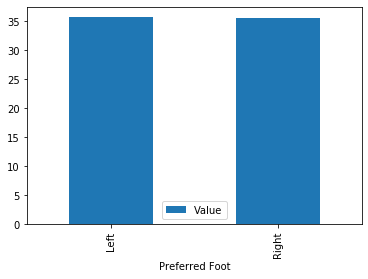

In [301]:
value_on_preffered_foot = df[['Preferred Foot','Value', 'Wage']].groupby(['Preferred Foot']).mean()
value_on_preffered_foot.plot(kind='bar',y='Wage')
value_on_preffered_foot.plot(kind='bar',y='Value')

In [ ]:
Оценим, как зависит стоимость игрока от его возраста и позиции.

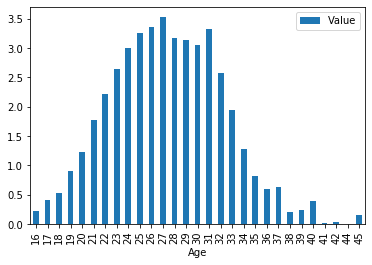

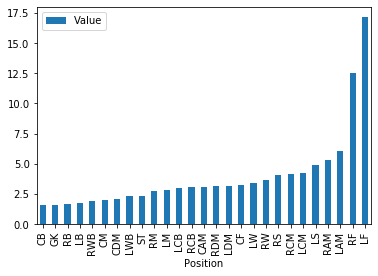

In [306]:
values_on_age = df[['Age', 'Value']].groupby(['Age']).mean()
values_on_age
values_on_age.plot(kind = 'bar')
values_on_age = df[['Position', 'Value']].groupby(['Position']).mean().sort_values('Value')
values_on_age.plot(kind = 'bar')

По первому графику видно, что нибольшую ценность представляют игроки от 25 до 27 лет. Это легко объясняется тем, что такие игроки находятся на пике формы и показывают свои лучшие результаты.
По второму графику видно, что больше всего ценятся игроки атакующей группы. Защитники же и вратарь находятся в конце списка.

import seaborn as sns
import numpy as np 

Сравним распредление игроков по возрасту среди топ 5 национальностей

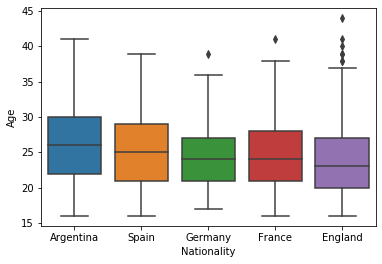

In [23]:
top_nationality = df.Nationality.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="Nationality", y="Age", 
            data=df[df.Nationality.isin(top_nationality)])

Из графика видно, что наиболее молодые игроки из Англии, но и также в Англии встречаются очень возрастные игроки до 45 лет. Наименьший же разброс имеют игроки из Германии.

Теперь посмотрим как зависят стоимости игроков от их националльностей. Рассматриваем топ 5 начиональностей, для наглядности данных рассматриваем игроков стоимостью выше 10М.

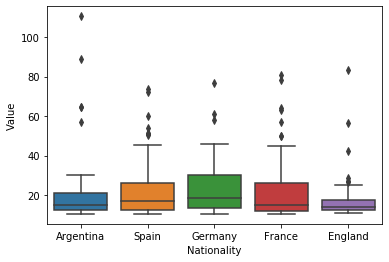

In [25]:
df = df.loc[df['Value'] > 10]
sns.boxplot(x="Nationality", y="Value", 
            data=df[df.Nationality.isin(top_nationality)])

У каждой национальности имеются выбросы. Эти выбросы - самые известные и профессиональные игроки современности. Самыми дорогие игроки имеются у Аргентины. Наиболее дешевые игроки оказались из Англии.